In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import KFold

In [2]:
def pre_processamento():
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    train_images = train_images.reshape((60000,28,28,1))
    train_images = train_images.astype('float32')/255 # Modificar os valores de cada pixel para que eles variem de 0 a 1 melhorará a taxa de aprendizado do nosso modelo.

    test_images = test_images.reshape((10000,28,28,1))
    test_images = test_images.astype('float32')/255 # Modificar os valores de cada pixel para que eles variem de 0 a 1 melhorará a taxa de aprendizado do nosso modelo.

    train_labels = to_categorical(train_labels) # Nosso modelo não pode trabalhar com dados categóricos diretamente. Portanto, devemos usar uma codificação quente. Em uma codificação ativa, os dígitos de 0 a 9 são representados como um conjunto de nove zeros e um único. O dígito é determinado pela localização do número 1. Por exemplo, você representaria um 3 como [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    test_labels = to_categorical(test_labels) # one hot encoding

    return train_images, train_labels, test_images, test_labels

In [3]:
# Definir a arquitetura da CNN
def criar_modelo(conv_layers, filters, dense_size):
    model = models.Sequential()

    # Adicionar camadas de convolução-pooling
    for i in range(conv_layers):
        model.add(layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape = (28,28,1)))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))


    model.add(layers.Flatten())
    model.add(layers.Dense(dense_size, activation='relu'))
    model.add(layers.Dense(10, activation='softmax')) # 10 é o número de classes
    
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [4]:
train_images, train_labels, test_images, test_labels = pre_processamento()

In [31]:
# Definir os valores fixos dos parâmetros
filters = 32
dense_size = 64

# Testar diferentes quantidades de camadas de convolução-pooling
conv_layers_list = [1, 2, 3]
folds = 5

In [32]:
cv = KFold(n_splits=folds, shuffle=True, random_state=42) # vamos embaralhá-los antes de dividi-lo, seed 42

In [35]:
melhor_acc = 0
melhor_layer = 0
for layer in conv_layers_list:
    fold_no = 1 #contador
    acc_per_fold = [] #acurácia de cada fold
    for train, test in cv.split(train_images, train_labels): #pra cada fold
        print(f"Treinando fold {fold_no}, com {layer} camada(s) de convolução-pooling" )
        train_X = train_images[train]
        test_X = train_images[test]
        model = criar_modelo(layer, filters, dense_size)
        model.fit(train_X, train_labels[train], epochs=5, batch_size = 64, verbose=2)
        test_loss, test_acc = model.evaluate(test_X, train_labels[test])
        acc_per_fold.append(test_acc * 100)
        fold_no = fold_no + 1

    media_acc_layer = sum(acc_per_fold)/len(acc_per_fold)

    print(f"Média acurácia dos 5 folds pra {layer} camada(s) de convolução-pooling:", media_acc_layer)
    print(f"Essa acurácia significa que o modelo usando {layer} camada(s) de convolução-pooling, filter: {filters} e tamanho da camada densa: {dense_size} é capaz de classificar corretamente em média {round(media_acc_layer, 1)}%  das imagens")
    if media_acc_layer > melhor_acc:
        melhor_acc = media_acc_layer
        melhor_layer = layer
print(f"Portanto, a melhor quantidade de camada(s) de convolução-pooling é {melhor_layer}, que possui {round(melhor_acc, 1)} de acurácia.")

Treinando fold 1, com 1 camada(s) de convolução-pooling
Epoch 1/5
750/750 - 20s - loss: 0.4808 - accuracy: 0.8299 - 20s/epoch - 27ms/step
Epoch 2/5


KeyboardInterrupt: 

In [12]:
melhor_acc = 0
melhor_layer = 0
for layer in conv_layers_list:
    fold_no = 1 #contador
    acc_per_fold = [] #acurácia de cada fold
    for train, test in cv.split(train_images, train_labels): #pra cada fold
        print(f"Treinando fold {fold_no}, com {layer} camada(s) de convolução-pooling" )
        train_X = train_images[train]
        test_X = train_images[test]
        model = criar_modelo(layer, filters, dense_size)
        model.fit(train_X, train_labels[train], epochs=2, batch_size = 64)
        test_loss, test_acc = model.evaluate(test_X, train_labels[test])
        acc_per_fold.append(test_acc * 100)
        fold_no = fold_no + 1

    media_acc_layer = sum(acc_per_fold)/len(acc_per_fold)

    print(f"Média acurácia dos 5 folds pra {layer} camada(s) de convolução-pooling:", media_acc_layer)
    print(f"Essa acurácia significa que o modelo usando {layer} camada(s) de convolução-pooling, filter: {filters} e tamanho da camada densa: {dense_size} é capaz de classificar corretamente em média {round(media_acc_layer, 1)}%  das imagens")
    if media_acc_layer > melhor_acc:
        melhor_acc = media_acc_layer
        melhor_layer = layer
print(f"Portanto, a melhor quantidade de camada(s) de convolução-pooling é {melhor_layer}, que possui {round(melhor_acc, 1)} de acurácia.")

Treinando fold 1
Epoch 1/2
469/469 [==============================] - 16s 33ms/step - loss: 0.5317 - accuracy: 0.8104
Epoch 2/2
938/938 [==============================] - 7s 7ms/step - loss: 0.3257 - accuracy: 0.8843
Treinando fold 2
Epoch 1/2
469/469 [==============================] - 13s 26ms/step - loss: 0.5492 - accuracy: 0.8063
Epoch 2/2
938/938 [==============================] - 5s 5ms/step - loss: 0.3317 - accuracy: 0.8830
Média acurácia dos 5 folds pra 1 camada(s) de convolução-pooling: 88.36333453655243
Essa acurácia significa que o modelo usando 1 camada(s) de convolução-pooling, filter: 32 e tamanho da camada densa: 64 é capaz de classificar corretamente em média 88.4%  das imagens
Treinando fold 1
Epoch 1/2
469/469 [==============================] - 21s 42ms/step - loss: 0.5931 - accuracy: 0.7852
Epoch 2/2
938/938 [==============================] - 8s 9ms/step - loss: 0.3685 - accuracy: 0.8675
Treinando fold 2
Epoch 1/2
469/469 [==============================] - 23s 45ms/st

In [14]:
filters_list = [16, 32, 64]

In [17]:
melhor_acc = 0
melhor_filter = 0
for filters in filters_list:
    fold_no = 1 #contador
    acc_per_fold = [] #acurácia de cada fold
    for train, test in cv.split(train_images, train_labels):
        print(f"Treinando fold {fold_no}, com {filters} filters" )
        train_X = train_images[train]
        test_X = train_images[test]
        model = criar_modelo(melhor_layer, filters, dense_size)
        model.fit(train_X, train_labels[train], epochs=2, batch_size = 64)
        test_loss, test_acc = model.evaluate(test_X, train_labels[test])
        acc_per_fold.append(test_acc * 100)
        fold_no = fold_no + 1

    media_acc_filters = sum(acc_per_fold)/len(acc_per_fold)

    print(f"Média acurácia dos 5 folds pra {filters} filters:", media_acc_filters)
    print(f"Essa acurácia significa que o modelo usando {melhor_layer} camada(s) de convolução-pooling, filter: {filters} e tamanho da camada densa: {dense_size} é capaz de classificar corretamente em média {round(media_acc_filters, 1)}% das imagens")
    if media_acc_filters > melhor_acc:
        melhor_acc = media_acc_filters
        melhor_filter = filters
print(f"Portanto, a melhor quantidade de filters é {melhor_filter}, que possui {round(melhor_acc, 1)} de acurácia.")

Treinando fold 1, com 16 filters
Epoch 1/2
469/469 [==============================] - 11s 19ms/step - loss: 0.5774 - accuracy: 0.7970
Epoch 2/2
938/938 [==============================] - 5s 5ms/step - loss: 0.3486 - accuracy: 0.8776
Treinando fold 2, com 16 filters
Epoch 1/2
469/469 [==============================] - 9s 16ms/step - loss: 0.5536 - accuracy: 0.8062
Epoch 2/2
938/938 [==============================] - 5s 5ms/step - loss: 0.3470 - accuracy: 0.8801
Média acurácia dos 5 folds pra 16 filters: 87.88666725158691
Essa acurácia significa que o modelo usando 1 camada(s) de convolução-pooling, filter: 16 e tamanho da camada densa: 64 é capaz de classificar corretamente em média 87.9% das imagens
Treinando fold 1, com 32 filters
Epoch 1/2
469/469 [==============================] - 15s 30ms/step - loss: 0.5523 - accuracy: 0.8075
Epoch 2/2
938/938 [==============================] - 8s 8ms/step - loss: 0.3160 - accuracy: 0.8889
Treinando fold 2, com 32 filters
Epoch 1/2
469/469 [======

In [20]:
dense_size_list = [64, 128, 256]

In [21]:
melhor_acc = 0
melhor_dense = 0
for dense_size in dense_size_list:
    fold_no = 1 #contador
    acc_per_fold = [] #acurácia de cada fold
    for train, test in cv.split(train_images, train_labels): #pra cada fold
        print(f"Treinando fold {fold_no}, com tamanho da camada densa: {dense_size}" )
        train_X = train_images[train]
        test_X = train_images[test]
        model = criar_modelo(melhor_layer, melhor_filter, dense_size)
        model.fit(train_X, train_labels[train], epochs=2, batch_size = 64)
        test_loss, test_acc = model.evaluate(test_X, train_labels[test])
        acc_per_fold.append(test_acc * 100)
        fold_no = fold_no + 1

    media_acc_dense = sum(acc_per_fold)/len(acc_per_fold)

    print(f"Média acurácia dos 5 folds pra tamanho da camada densa: {dense_size}:", media_acc_dense)
    print(f"Essa acurácia significa que o modelo usando {melhor_layer} camada(s) de convolução-pooling, filter: {melhor_filter} e tamanho da camada densa: {dense_size} é capaz de classificar corretamente em média {round(media_acc_dense, 1)}% das imagens")
    if media_acc_dense > melhor_acc:
        melhor_acc = media_acc_dense
        melhor_dense = dense_size
print(f"Portanto, o melhor tamanho da camada densa é {melhor_dense}, que possui {round(melhor_acc, 1)} de acurácia.")

Treinando fold 1, com tamanho da camada densa: 64
Epoch 1/2
469/469 [==============================] - 13s 24ms/step - loss: 0.5476 - accuracy: 0.8054
Epoch 2/2
938/938 [==============================] - 4s 4ms/step - loss: 0.3296 - accuracy: 0.8817
Treinando fold 2, com tamanho da camada densa: 64
Epoch 1/2
469/469 [==============================] - 11s 22ms/step - loss: 0.5275 - accuracy: 0.8143
Epoch 2/2
938/938 [==============================] - 6s 6ms/step - loss: 0.3275 - accuracy: 0.8856
Média acurácia dos 5 folds pra tamanho da camada densa: 64: 88.36666643619537
Essa acurácia significa que o modelo usando 1 camada(s) de convolução-pooling, filter: 32 e tamanho da camada densa: 64 é capaz de classificar corretamente em média 88.4% das imagens
Treinando fold 1, com tamanho da camada densa: 128
Epoch 1/2
469/469 [==============================] - 18s 36ms/step - loss: 0.5116 - accuracy: 0.8204
Epoch 2/2
938/938 [==============================] - 8s 8ms/step - loss: 0.3196 - accur

In [26]:
print(f"Ao final, a melhor combinação foi: \n{melhor_layer} camada(s) de convolução-pooling, {melhor_filter} filter(s) e tamanho da camada densa: {melhor_dense}")

Ao final, a melhor combinação foi: 
1 camada(s) de convolução-pooling, 32 filter(s) e tamanho da camada densa: 128


O que é dropout? Avalie diferentes porcentagens de dropout. Quanto dropout é melhor?

O Dropout é uma técnica de regularização utilizada para reduzir o overfitting em redes neurais. Durante o treinamento, uma proporção dos neurônios é aleatoriamente "desligada" (dropout) em cada atualização do gradiente, o que força a rede a aprender recursos mais robustos e evita a dependência excessiva de neurônios específicos.

Vamos modificar a função create_cnn_model_with_dense_size para adicionar uma camada Dropout antes da camada densa:

In [27]:
def criar_modelo_com_dropout(conv_layers, filters, dense_size, dropout_rate):
    model = models.Sequential()

    for i in range(conv_layers):
        model.add(layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape = (28,28,1)))
        print("Conv2D")
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        print("MaxPooling2D")

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_size, activation='relu'))
    model.add(layers.Dropout(dropout_rate)) #Dropout adicionado
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [28]:
dropout_rates = [0.1, 0.3, 0.5, 0.7]

melhor_acc = 0
melhor_dropout = 0
for dropout_rate in dropout_rates:
    fold_no = 1 #contador
    acc_per_fold = [] #acurácia de cada fold
    for train, test in cv.split(train_images, train_labels): #pra cada fold
        print(f"Treinando fold {fold_no}, com {dropout_rate} de dropout_rate" )
        train_X = train_images[train]
        test_X = train_images[test]
        model = criar_modelo_com_dropout(melhor_layer, melhor_filter, melhor_dense, dropout_rate)
        model.fit(train_X, train_labels[train], epochs=2, batch_size = 64)
        test_loss, test_acc = model.evaluate(test_X, train_labels[test])
        acc_per_fold.append(test_acc * 100)
        fold_no = fold_no + 1

    media_acc_dropout = sum(acc_per_fold)/len(acc_per_fold)

    print(f"Média acurácia dos 5 folds pra {dropout_rate} de dropout_rate:", media_acc_dropout)
    print(f"Essa acurácia significa que o modelo usando layer: {melhor_layer}, filter: {melhor_filter}, tamanho da camada densa: {melhor_dense} e dropout: {dropout_rate} é capaz de classificar corretamente em média {round(media_acc_dropout, 1)}% das imagens")
    if media_acc_dropout > melhor_acc:
        melhor_acc = media_acc_dropout
        melhor_dropout = dropout_rate
print(f"Portanto, o melhor dropout é {melhor_dropout}, que possui {round(melhor_acc, 1)} de acurácia.")

Treinando fold 1, com 0.1 de dropout_rate
Conv2D
MaxPooling2D
Epoch 1/2
469/469 [==============================] - 16s 32ms/step - loss: 0.5306 - accuracy: 0.8137
Epoch 2/2
938/938 [==============================] - 6s 6ms/step - loss: 0.3178 - accuracy: 0.8860
Treinando fold 2, com 0.1 de dropout_rate
Conv2D
MaxPooling2D
Epoch 1/2
469/469 [==============================] - 16s 32ms/step - loss: 0.5218 - accuracy: 0.8168
Epoch 2/2
938/938 [==============================] - 6s 6ms/step - loss: 0.3071 - accuracy: 0.8904
Média acurácia dos 5 folds pra 0.1 de dropout_rate: 88.81666660308838
Essa acurácia significa que o modelo usando layer: 1, filter: 32, tamanho da camada densa: 128 e dropout: 0.1 é capaz de classificar corretamente 8881.7% das imagens
Treinando fold 1, com 0.3 de dropout_rate
Conv2D
MaxPooling2D
Epoch 1/2
469/469 [==============================] - 16s 33ms/step - loss: 0.5927 - accuracy: 0.7914
Epoch 2/2
938/938 [==============================] - 6s 7ms/step - loss: 0.32

E. O que é batch normalization? Aplique batch normalization e avalie como ela ajuda?

Batch Normalization é uma técnica usada para acelerar o treinamento de redes neurais e estabilizar o processo de aprendizado. Ela normaliza a ativação de cada camada, aplicando uma transformação que mantém a média próxima de zero e o desvio padrão próximo de um. Isso ajuda a reduzir a covariância de ativação entre as camadas e torna o treinamento mais rápido e estável.

Vamos modificar a função create_cnn_model_with_dense_dropout para adicionar uma camada Batch Normalization antes da camada densa:

In [29]:
# Definir a arquitetura da CNN
def criar_modelo_com_batchnorm(conv_layers, filters, dense_size, dropout_rate):
    model = models.Sequential()

    # Adicionar camadas de convolução-pooling
    for i in range(conv_layers):
        model.add(layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape = (28,28,1)))
        print("Conv2D")
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        print("MaxPooling2D")


    model.add(layers.Flatten())
    model.add(layers.Dense(dense_size, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax')) # 10 é o número de classes
    
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [30]:
fold_no = 1 #contador
acc_per_fold = [] #acurácia de cada fold
for train, test in cv.split(train_images, train_labels): #pra cada fold
    print(f"Treinando fold {fold_no}, com batch normalization" )
    train_X = train_images[train]
    test_X = train_images[test]
    model = criar_modelo_com_batchnorm(melhor_layer, melhor_filter, melhor_dense, melhor_dropout)
    model.fit(train_X, train_labels[train], epochs=2, batch_size = 64)
    test_loss, test_acc = model.evaluate(test_X, train_labels[test])
    acc_per_fold.append(test_acc * 100)
    fold_no = fold_no + 1

media_acc_batchnorm = sum(acc_per_fold)/len(acc_per_fold)

print(f"Média acurácia dos 5 folds com batch normalization:", media_acc_batchnorm)
print(f"Essa acurácia significa que o modelo usando layer: {melhor_layer}, filter: {melhor_filter}, tamanho da camada densa: {melhor_dense}, dropout: {melhor_dropout} e com batch normalization é capaz de classificar corretamente em média {round(media_acc_batchnorm, 1)}% das imagens")

print(f"Portanto, possui em média {round(media_acc_batchnorm, 1)} de acurácia.")

Treinando fold 1, com batchnorm
Conv2D
MaxPooling2D
Epoch 1/2
469/469 [==============================] - 18s 34ms/step - loss: 0.4344 - accuracy: 0.8477
Epoch 2/2
938/938 [==============================] - 7s 7ms/step - loss: 0.2969 - accuracy: 0.8916
Treinando fold 2, com batchnorm
Conv2D
MaxPooling2D
Epoch 1/2
469/469 [==============================] - 16s 32ms/step - loss: 0.4139 - accuracy: 0.8546
Epoch 2/2
938/938 [==============================] - 7s 7ms/step - loss: 0.2974 - accuracy: 0.8944
Média acurácia dos 5 folds com batchnorm 89.3016666173935
Essa acurácia significa que o modelo usando layer: 1, filter: 32, tamanho da camada densa: 128 e dropout: 0.1 é capaz de classificar corretamente em média 89.3% das imagens
Portanto, possui em média 8930.2 de acurácia.


F. O que é data augmentation? Aplique data augmentation e avalie como ele ajuda?

Data Augmentation é uma técnica usada para expandir o conjunto de dados de treinamento, aplicando transformações aleatórias nos dados existentes, como rotação, zoom, espelhamento, deslocamento, entre outros. Essa técnica é útil quando o conjunto de dados de treinamento é limitado, pois permite aumentar a diversidade dos exemplos apresentados ao modelo.

Vamos usar a biblioteca imgaug para aplicar Data Augmentation no conjunto de dados Fashion MNIST. Primeiro, instale a biblioteca usando o seguinte comando: pip install imgaug

In [ ]:
fold_no = 1 #contador
acc_per_fold = [] #acurácia de cada fold
for train, test in cv.split(train_images, train_labels): #pra cada fold
    print(f"Treinando fold {fold_no}, com batch normalization" )
    train_X = train_images[train]
    test_X = train_images[test]
    model = criar_modelo_com_batchnorm(melhor_layer, melhor_filter, melhor_dense, melhor_dropout)
    model.fit(train_X, train_labels[train], epochs=2, batch_size = 64)
    test_loss, test_acc = model.evaluate(test_X, train_labels[test])
    acc_per_fold.append(test_acc * 100)
    fold_no = fold_no + 1

media_acc_batchnorm = sum(acc_per_fold)/len(acc_per_fold)

print(f"Média acurácia dos 5 folds com batch normalization:", media_acc_batchnorm)
print(f"Essa acurácia significa que o modelo usando layer: {melhor_layer}, filter: {melhor_filter}, tamanho da camada densa: {melhor_dense}, dropout: {melhor_dropout} e com batch normalization é capaz de classificar corretamente em média {round(media_acc_batchnorm, 1)}% das imagens")

print(f"Portanto, possui em média {round(media_acc_batchnorm, 1)} de acurácia.")

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar um gerador de data augmentation
augmenter = ImageDataGenerator(
    rotation_range=20, # podem ser rotacionadas aleatoriamente em um ângulo de -20 a 20 graus
    width_shift_range=0.2, # as imagens podem ser deslocadas horizontalmente em até 20% da largura da imagem
    height_shift_range=0.2,  # as imagens podem ser deslocadas verticalmente em até 20% da largura da imagem
    shear_range=0.2, # as imagens podem ser distorcidas com um valor de cisalhamento aleatório entre -0.2 e 0.2
    zoom_range=0.2, # as imagens podem ser ampliadas ou reduzidas em até 20% aleatoriamente.
    horizontal_flip=True # imagens podem ser invertidas horizontalmente durante o data augmentation.
)

# Ajustar o gerador aos dados de treinamento
# datagen.fit(train_images.reshape((-1, 28, 28, 1)))

fold_no = 1 #contador
acc_per_fold = [] #acurácia de cada fold
for train, test in cv.split(train_images, train_labels): #pra cada fold
    print(f"Treinando fold {fold_no}, com data augmentation")
    
    # Obter os conjuntos de treinamento e teste para o fold atual
    train_X, test_X = train_images[train], train_images[test]
    train_y, test_y = train_labels[train], train_labels[test]
    
    # Aplicar o data augmentation aos dados de treinamento
    augmenter.fit(train_X)
    augmented_train_X = augmenter.flow(train_X, train_y, batch_size=32)

    model = criar_modelo_com_batchnorm(melhor_layer, melhor_filter, melhor_dense, melhor_dropout)

    model.fit(augmented_train_X, epochs=5, validation_data=(test_X, test_y), verbose=2)

    test_loss, test_acc = model.evaluate(test_X, train_labels[test], verbose=2)
    acc_per_fold.append(test_acc * 100)
    fold_no = fold_no + 1

media_acc_dataaug = sum(acc_per_fold)/len(acc_per_fold)

print(f"Média acurácia dos 5 folds com data augmentation:", media_acc_dataaug)
print(f"Essa acurácia significa que o modelo usando layer: {melhor_layer}, filter: {melhor_filter}, tamanho da camada densa: {melhor_dense}, dropout: {melhor_dropout}, com batch normalization e com data augmentation é capaz de classificar corretamente em média {round(media_acc_dataaug, 1)}% das imagens")

print(f"Portanto, possui em média {round(media_acc_dataaug, 1)} de acurácia.")


# model = criar_modelo_com_batchnorm(melhor_layer, melhor_filter, melhor_dense, melhor_dropout)

# model.fit(
#     datagen.flow(train_images.reshape((-1, 28, 28, 1)), train_labels, batch_size=64),
#     epochs=5,
#     validation_data=(test_images.reshape((-1, 28, 28, 1)), test_labels),
#     verbose=2
# )

# test_loss, test_acc = model.evaluate(test_X, test_y, verbose=2)

Treinando fold 1, com data augmentation
Conv2D
MaxPooling2D
Epoch 1/5
1500/1500 - 63s - loss: 0.9008 - accuracy: 0.6712 - val_loss: 0.8022 - val_accuracy: 0.7245 - 63s/epoch - 42ms/step
Epoch 2/5
1500/1500 - 51s - loss: 0.7341 - accuracy: 0.7281 - val_loss: 0.6429 - val_accuracy: 0.7781 - 51s/epoch - 34ms/step
Epoch 3/5
1500/1500 - 47s - loss: 0.6909 - accuracy: 0.7430 - val_loss: 0.6192 - val_accuracy: 0.7947 - 47s/epoch - 32ms/step
Epoch 4/5
1500/1500 - 47s - loss: 0.6665 - accuracy: 0.7531 - val_loss: 0.7742 - val_accuracy: 0.7508 - 47s/epoch - 31ms/step
Epoch 5/5
1500/1500 - 47s - loss: 0.6536 - accuracy: 0.7590 - val_loss: 0.7196 - val_accuracy: 0.7692 - 47s/epoch - 31ms/step
375/375 - 2s - loss: 0.7196 - accuracy: 0.7692 - 2s/epoch - 6ms/step
Treinando fold 2, com data augmentation
Conv2D
MaxPooling2D
Epoch 1/5
1500/1500 - 48s - loss: 0.9225 - accuracy: 0.6618 - val_loss: 0.6593 - val_accuracy: 0.7562 - 48s/epoch - 32ms/step
Epoch 2/5
1500/1500 - 48s - loss: 0.7280 - accuracy: 0.

In [75]:
dct_dataaug = {}
media_acc_dataaug = sum(acc_per_fold)/len(acc_per_fold)

dct_dataaug.update({"acuracia": media_acc_dataaug , "loss": 100 })

In [ ]:
dct_dataaug = {}

media_acc_dataaug = sum(acc_per_fold)/len(acc_per_fold)
media_loss_dataaug  = sum(test_loss)/len(test_loss)

dct_dataaug.update({"acuracia": media_acc_dataaug , "loss": media_loss_dataaug })

In [65]:
num_batches = train_images.shape[0] // 32
total_augmented_images = num_batches * 32


In [71]:
len(test_X)

12000

In [69]:
len(augmented_train_X)

1500

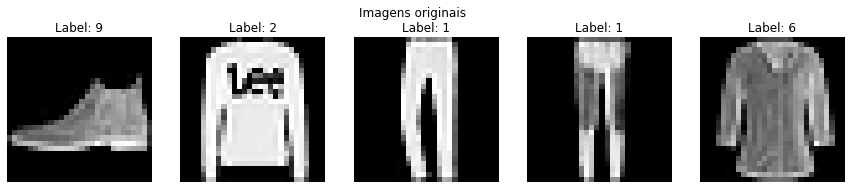

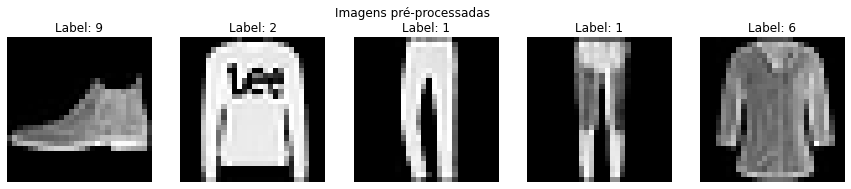

In [48]:
# Selecionar algumas imagens aleatórias do conjunto de teste
sample_images = test_images[:5]
sample_labels = test_labels[:5]

# Plotar as imagens originais
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    ax.set_title('Label: {}'.format(sample_labels[i].argmax()))
    ax.axis('off')
plt.suptitle('Imagens originais')
plt.show()

# Aplicar o pré-processamento nas imagens
sample_images_preprocessed = sample_images * 255.0

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(sample_images_preprocessed[i].reshape(28, 28), cmap='gray')
    ax.set_title('Label: {}'.format(sample_labels[i].argmax()))
    ax.axis('off')
plt.suptitle('Imagens pré-processadas')
plt.show()

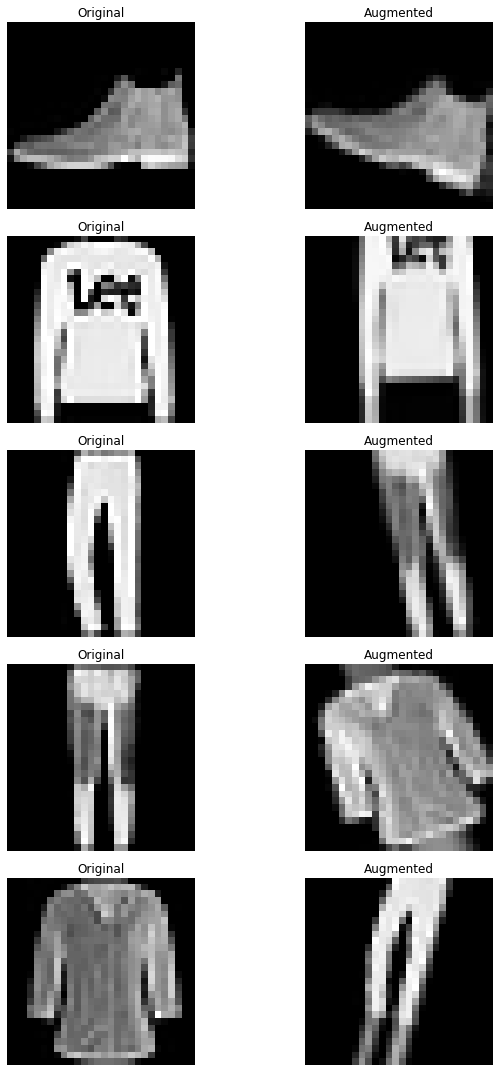

In [52]:
import matplotlib.pyplot as plt

# Selecionar algumas imagens originais
sample_images = test_images[:5]
sample_labels = test_labels[:5]

# Gerar imagens aumentadas usando o gerador de data augmentation
augmented_images = datagen.flow(sample_images, sample_labels, batch_size=1)

# Plotar as imagens originais e as imagens aumentadas
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
for i, ax in enumerate(axes):
    # Plotar imagem original
    ax[0].imshow(sample_images[i].reshape(28, 28), cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')
    
    # Plotar imagem aumentada
    augmented_image = augmented_images.next()[0]
    ax[1].imshow(augmented_image.reshape(28, 28), cmap='gray')
    ax[1].set_title('Augmented')
    ax[1].axis('off')

plt.tight_layout()
plt.show()


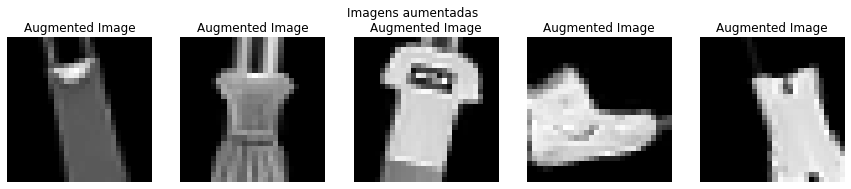

In [49]:
# Gerar algumas imagens aumentadas usando o gerador de data augmentation
augmented_images = datagen.flow(train_images[:5], train_labels[:5], batch_size=1)

# Plotar as imagens aumentadas
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    augmented_image = augmented_images.next()[0]
    ax.imshow(augmented_image.reshape(28, 28), cmap='gray')
    ax.set_title('Augmented Image')
    ax.axis('off')
plt.suptitle('Imagens aumentadas')
plt.show()


In [46]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_41 (Flatten)        (None, 6272)              0         
                                                                 
 dense_82 (Dense)            (None, 128)               802944    
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_13 (Dropout)        (None, 128)             

In [15]:
model = criar_modelo_com_batchnorm(2, 64, 256, 0.1)


Conv2D
MaxPooling2D
Conv2D


In [19]:
# Converter as imagens para uint8 e expandir a dimensão para três canais
train_images_uint8 = np.expand_dims((train_images * 255).astype(np.uint8), axis=-1)
train_images_uint8 = np.repeat(train_images_uint8, 3, axis=-1)

# Aplicar Data Augmentation nos dados de treinamento
train_images_augmented = augmenter(images=train_images_uint8)


# Concatenar os dados originais com os dados aumentados
train_images_combined = np.concatenate([train_images_uint8, train_images_augmented])
train_labels_combined = np.concatenate([train_labels, train_labels])

# Treinar o modelo com os dados aumentados
model.fit(train_images_combined, train_labels_combined, epochs=5, batch_size=64, verbose=0)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss:", test_loss, "\ntest_acc:", test_acc)
print(f"Essa acurácia significa que o modelo usando layer: {melhor_layer}, filter: {melhor_filter}, tamanho da camada densa: {melhor_dense}, dropout: {dropout_rate}, com batch normalization e com data augmentation é capaz de classificar corretamente {round(test_acc*100, 1)}%  das imagens")

print(f"Portanto, possui {round(test_acc*100, 1)} de acurácia.")

AssertionError: Expected image with two or three dimensions, but got 4 dimensions and shape (23, 26, 1, 3).